## Simple linear regression

#### packages

In [1]:
from matplotlib import numpy as np, pyplot as plt
import pandas as pd
import utilities as utl

data loading. (the path entered is a local path)

In [2]:
path = '/home/mahdi/Github/Regression/Linear/Data/slr01.xls'
cdf = pd.read_excel(path)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


#### understanding data

In [3]:
cdf.describe()

,X,Y
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


In [4]:
cdf.index

RangeIndex(start=0, stop=23, step=1)

In [5]:
cdf.keys()

Index(['X', 'Y'], dtype='object')

In [6]:
cdf.head(5)

,X,Y
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


#### plotting data

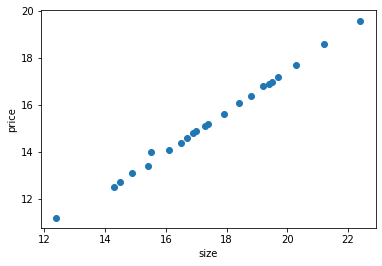

In [7]:
plt.scatter(cdf.iloc[:,0],cdf.iloc[:,1]);
plt.xlabel('size') ; plt.ylabel('price')
plt.show()

In [8]:
x = np.asarray([cdf.iloc[:,0]]).reshape(-1,1)
y = np.asarray([cdf.iloc[:,1]]).reshape(-1,1)
w0 = np.random.randn(2,1)



iteration no. 1
bias = [-1.20592066]
coefficients = [[0.43295384]]
loss = 81.49351467965909



iteration no. 2
bias = [-1.20583121]
coefficients = [[0.43453929]]
loss = 80.98681898007345



iteration no. 3
bias = [-1.20574205]
coefficients = [[0.4361198]]
loss = 80.48327598217723



iteration no. 4
bias = [-1.20565316]
coefficients = [[0.43769538]]
loss = 79.9828660696045



iteration no. 5
bias = [-1.20556455]
coefficients = [[0.43926605]]
loss = 79.48556974804391



iteration no. 6
bias = [-1.20547621]
coefficients = [[0.44083183]]
loss = 78.99136764447934



iteration no. 7
bias = [-1.20538815]
coefficients = [[0.44239273]]
loss = 78.50024050643509



iteration no. 8
bias = [-1.20530036]
coefficients = [[0.44394877]]
loss = 78.012169201226



iteration no. 9
bias = [-1.20521284]
coefficients = [[0.44549996]]
loss = 77.52713471521196



iteration no. 10
bias = [-1.2051256]
coefficients = [[0.44704631]]
loss = 77.04511815305739



iteration no. 11
bias = [-1.20503862]
coefficients =

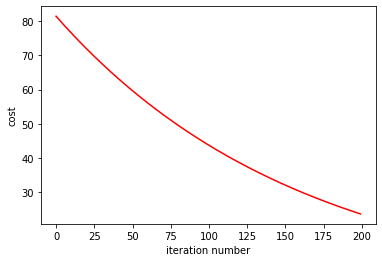

In [9]:
utl.gradient_descent(x,y,w0,max_iter=200,learning_rate=.00001,plot=True,verbose=True);

In [10]:
weights = utl.normal_equation(x,y,w0)
print(weights)
print(utl.loss_MSE(x,y,weights))

[[0.43458449]
 [0.85114404]]
0.01181207791104952


#### using scikitlearn

In [11]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
c = LinearRegression()
fit = c.fit(x,y);
print(fit.intercept_,fit.coef_)

[0.43458449] [[0.85114404]]


#### plot model on data

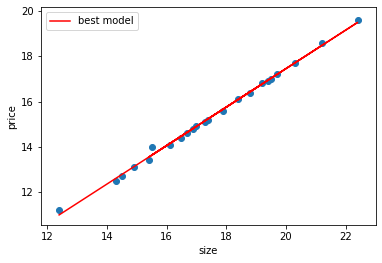

In [13]:
plt.plot(x, utl.Hyp(x,weights),c='red',label='best model')
plt.scatter(cdf.iloc[:,0],cdf.iloc[:,1]);
plt.xlabel('size') ; plt.ylabel('price') ; plt.legend()
plt.show()

## Multiple linear regression

In [14]:
path2 = '/home/mahdi/Github/Regression/Linear/Data/HousePrice.csv'
cdf2 = pd.read_csv(path2)

#### understanding data

In [15]:
cdf2.describe()

,x0,size (feet),bedrooms,floors,age (- year),price ($)
count,250.0,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.0,337.908000,2.820000,1.544000,-17.872000,1839.748000
std,0.0,144.978005,1.159733,0.499059,9.879577,835.820716
min,1.0,63.000000,1.000000,1.000000,-34.000000,192.000000
25%,1.0,227.250000,2.000000,1.000000,-26.000000,1155.000000
50%,1.0,336.000000,2.000000,2.000000,-18.000000,1842.500000
75%,1.0,466.500000,4.000000,2.000000,-9.000000,2581.750000
max,1.0,598.000000,5.000000,2.000000,0.000000,3400.000000


In [16]:
cdf2.index

RangeIndex(start=0, stop=250, step=1)

In [17]:
cdf2.keys()

Index(['x0', 'size (feet)', 'bedrooms', 'floors', 'age (- year)', 'price ($)'], dtype='object')

In [18]:
cdf2.head(10)

,x0,size (feet),bedrooms,floors,age (- year),price ($)
0,1,63,1,1,-24,192
1,1,63,1,1,-16,215
2,1,65,1,2,-30,270
3,1,67,1,2,-17,278
4,1,71,1,2,-22,283
5,1,80,1,1,-18,290
6,1,83,1,1,-31,306
7,1,86,1,2,-31,351
8,1,94,1,1,-29,362
9,1,101,1,1,-3,460


/home/mahdi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/home/mahdi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/mahdi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/mahdi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:95: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


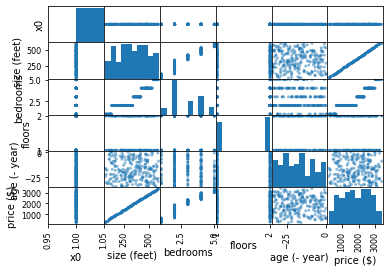

In [19]:
df = pd.DataFrame(cdf2,columns=cdf2.keys())
pd.plotting.scatter_matrix(df);
plt.show()

### create a subscribe

In [20]:
x = np.asarray([cdf2['size (feet)'],cdf2['bedrooms']]).reshape(-1,2)
y = np.asarray([cdf2['price ($)']]).reshape(-1,1)
w0 = np.random.randn(3,1)

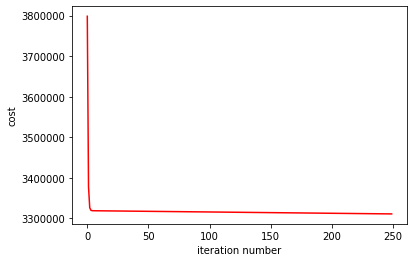

(array([[4.50028651],
        [1.94896296],
        [1.39130538]]),
 3310793.4065162377)

In [21]:
utl.gradient_descent(x,y,w0,max_iter=250,learning_rate=.00001,plot=True)

In [22]:
utl.normal_equation(x,y,w0)

array([[2279.07564255],
       [ 153.93357084],
       [-155.57488754]])

#### using scikit learn

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [24]:
c2 = LinearRegression()
f = c2.fit(x_train,y_train) ; p = c2.predict(x_test)

In [25]:
print(f.intercept_,f.coef_)

[2300.65697449] [[ 116.15047997 -117.86682034]]


In [26]:
print(r2_score(p,y_test))

-1.3860208214718295
